In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [127]:
df = pd.read_csv('customer_dataset.csv')

### EDA

In [128]:

variaveis_seg = df[['income','spending_score','membership_years','purchase_frequency','last_purchase_amount']]

num_all_null_rows = variaveis_seg.isnull().all(axis=1).sum()

print("Número de linhas onde todas as variáveis são vazias ou nulas:", num_all_null_rows)

num_any_null_rows = variaveis_seg.isnull().any(axis=1).sum()
print("Número de linhas onde pelo menos uma variável é vazia ou nula:", num_any_null_rows)

Número de linhas onde todas as variáveis são vazias ou nulas: 25
Número de linhas onde pelo menos uma variável é vazia ou nula: 963


In [61]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    517 non-null    float64
 1   age                   451 non-null    float64
 2   gender                491 non-null    object 
 3   income                512 non-null    float64
 4   spending_score        465 non-null    float64
 5   membership_years      484 non-null    float64
 6   purchase_frequency    515 non-null    float64
 7   preferred_category    505 non-null    object 
 8   last_purchase_amount  497 non-null    float64
dtypes: float64(7), object(2)
memory usage: 70.4+ KB
(1000, 9)


In [62]:
df.tail()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
995,996.0,57.0,NaN,112170.0,NaN,6.0,1.0,Clothing,313.64
996,NaN,NaN,Other,65337.0,NaN,10.0,NaN,NaN,NaN
997,998.0,23.0,NaN,NaN,NaN,NaN,42.0,Sports,NaN
998,NaN,22.0,Female,NaN,63.0,NaN,NaN,Elec,505.16
999,NaN,36.0,NaN,90420.0,NaN,NaN,31.0,Groceries,NaN


In [63]:
df['preferred_category'].value_counts()

preferred_category
Elec             112
Home & Garden    109
Groceries        104
Sports            99
Clothing          81
Name: count, dtype: int64

In [64]:
df['id'] = df['id'].astype(str)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   451 non-null    float64
 2   gender                491 non-null    object 
 3   income                512 non-null    float64
 4   spending_score        465 non-null    float64
 5   membership_years      484 non-null    float64
 6   purchase_frequency    515 non-null    float64
 7   preferred_category    505 non-null    object 
 8   last_purchase_amount  497 non-null    float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [66]:
df['age'].isnull().sum()

np.int64(549)

In [67]:
df.describe()

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,451.000000,5.120000e+02,465.000000,484.000000,515.000000,497.000000
mean,43.168514,9.820104e+04,52.494624,5.528926,26.019417,502.134547
std,15.258746,1.041681e+05,30.179857,2.851971,14.386400,301.032609
min,18.000000,3.005800e+04,1.000000,1.000000,1.000000,10.400000
25%,30.000000,5.869500e+04,28.000000,3.000000,14.000000,215.920000
50%,43.000000,8.789650e+04,50.000000,5.500000,26.000000,495.490000
75%,56.000000,1.156020e+05,78.000000,8.000000,38.000000,772.890000
max,69.000000,1.479620e+06,210.000000,10.000000,50.000000,998.510000


##Tratamento valores nulos

In [68]:
def tratar_nulos_media(df, colunas):
    for i in colunas:
        df[i] = df[i].fillna(df[i].mean())
    # df['income'] = df['income'].fillna(df['income'].mean())
    # df['spending_score'] = df['spending_score'].fillna(df['spending_score'].mean())
    # df['membership_years'] = df['membership_years'].fillna(df['membership_years'].mean())
    # df['purchase_frequency'] = df['purchase_frequency'].fillna(df['purchase_frequency'].mean())
    # df['last_purchase_amount'] = df['last_purchase_amount'].fillna(df['last_purchase_amount'].mean())

In [69]:
#tratar_nulos_media(df=df, colunas=['income','spending_score','membership_years','purchase_frequency','last_purchase_amount','age'])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   451 non-null    float64
 2   gender                491 non-null    object 
 3   income                512 non-null    float64
 4   spending_score        465 non-null    float64
 5   membership_years      484 non-null    float64
 6   purchase_frequency    515 non-null    float64
 7   preferred_category    505 non-null    object 
 8   last_purchase_amount  497 non-null    float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


In [71]:
df['gender'].value_counts()

gender
Other     166
Male       95
Female     67
M          51
male       44
female     41
F          27
Name: count, dtype: int64

## Transformando valores categoricos

In [72]:
female = ['female', 'F']
male = ['male', 'M', 'M ']

def padronizar_cat(df, coluna, lista_valores, valor):
    for i in lista_valores:
        df[coluna] = df[coluna].replace(i, valor)
        return df[coluna].value_counts()


df['gender'] = df['gender'].replace('female', 'Female')
df['gender'] = df['gender'].replace('F', 'Female')
df['gender'] = df['gender'].replace('M', 'Male')
df['gender'] = df['gender'].replace('male', 'Male')

In [73]:
padronizar_cat(df, 'gender', female, 'Female')

gender
Male      190
Other     166
Female    135
Name: count, dtype: int64

In [74]:
padronizar_cat(df,'gender', male, 'Male')

gender
Male      190
Other     166
Female    135
Name: count, dtype: int64

In [75]:
df['preferred_category'].value_counts()

preferred_category
Elec             112
Home & Garden    109
Groceries        104
Sports            99
Clothing          81
Name: count, dtype: int64

In [76]:
df['gender'] = df['gender'].fillna('Unknown')

In [77]:
df['preferred_category'] = df['preferred_category'].fillna('Unknown')

In [78]:
df['preferred_category'].value_counts(normalize=True)

preferred_category
Unknown          0.495
Elec             0.112
Home & Garden    0.109
Groceries        0.104
Sports           0.099
Clothing         0.081
Name: proportion, dtype: float64

In [79]:
df['gender'].value_counts(normalize=True)

gender
Unknown    0.509
Male       0.190
Other      0.166
Female     0.135
Name: proportion, dtype: float64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   object 
 1   age                   451 non-null    float64
 2   gender                1000 non-null   object 
 3   income                512 non-null    float64
 4   spending_score        465 non-null    float64
 5   membership_years      484 non-null    float64
 6   purchase_frequency    515 non-null    float64
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  497 non-null    float64
dtypes: float64(6), object(3)
memory usage: 70.4+ KB


## Transformando tipo das variáveis

In [81]:
df['age'] = df['age'].round()

In [82]:
#df['age'] = df['age'].astype(int)
#df['income'] = df['income'].astype(int)

In [83]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1.0,NaN,Unknown,99342.0,NaN,NaN,NaN,Unknown,NaN
1,nan,NaN,Female,78852.0,NaN,2.0,42.0,Sports,41.93
2,3.0,NaN,Female,NaN,NaN,2.0,28.0,Unknown,NaN
3,nan,NaN,Other,NaN,74.0,NaN,5.0,Unknown,NaN
4,5.0,NaN,Unknown,140621.0,210.0,NaN,25.0,Unknown,NaN


## visualização de distribuição

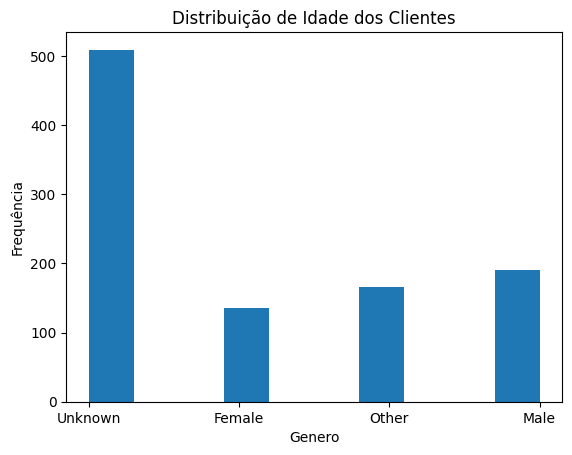

In [84]:
plt.hist(df['gender'], bins=10)
plt.xlabel('Genero')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade dos Clientes')
plt.show()

In [85]:
df = df[df['spending_score'] <= 100]

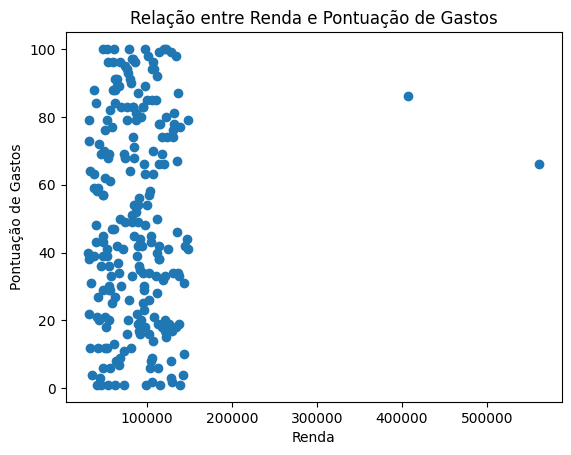

In [86]:
plt.scatter(df['income'], df['spending_score'])
plt.xlabel('Renda')
plt.ylabel('Pontuação de Gastos')
plt.title('Relação entre Renda e Pontuação de Gastos')
plt.show()

# Criando Segmentação

In [87]:

df['faixa_renda'],bins = pd.qcut(df['income'], q=3,retbins=True, duplicates='drop')

In [88]:
df['faixa_renda'].value_counts()

faixa_renda
(31153.999, 66656.0]    78
(66656.0, 102123.0]     78
(102123.0, 561250.0]    78
Name: count, dtype: int64

In [89]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,faixa_renda
3,nan,NaN,Other,NaN,74.0,NaN,5.0,Unknown,NaN,NaN
6,nan,19.0,Unknown,54319.0,68.0,NaN,NaN,Clothing,NaN,"(31153.999, 66656.0]"
7,8.0,NaN,Male,108115.0,94.0,9.0,27.0,Unknown,NaN,"(102123.0, 561250.0]"
12,nan,29.0,Unknown,87461.0,81.0,3.0,27.0,Home & Garden,NaN,"(66656.0, 102123.0]"
14,nan,NaN,Unknown,NaN,17.0,NaN,NaN,Home & Garden,915.89,NaN


In [90]:
income_counts = df['faixa_renda'].value_counts()

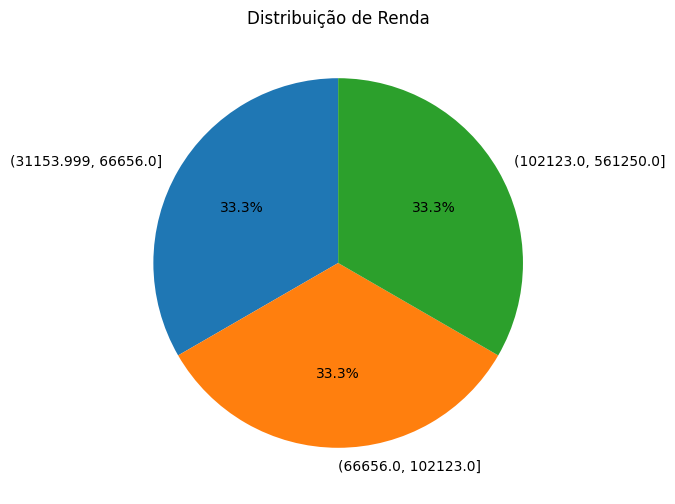

In [91]:
plt.figure(figsize=(8, 6))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Renda')
plt.show()

C:\Users\julio\AppData\Local\Temp\ipykernel_11976\2247248303.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('faixa_renda')['spending_score'].mean().plot(kind='bar')


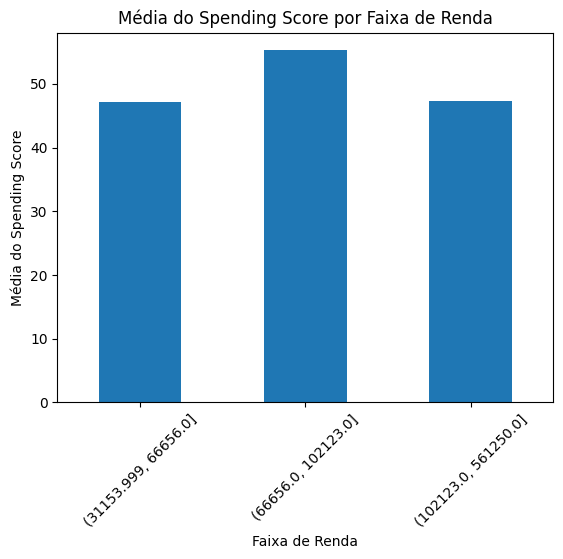

In [92]:
df.groupby('faixa_renda')['spending_score'].mean().plot(kind='bar')
plt.title('Média do Spending Score por Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média do Spending Score')
plt.xticks(rotation=45)
plt.show()

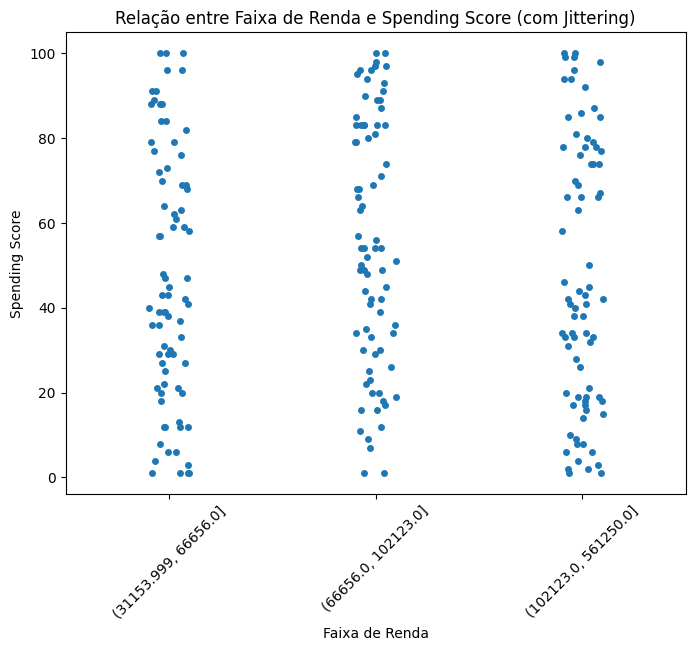

In [93]:

plt.figure(figsize=(8, 6))
sns.stripplot(x='faixa_renda', y=df['spending_score'], data=df, jitter=True, dodge=True)
plt.title('Relação entre Faixa de Renda e Spending Score (com Jittering)')
plt.xlabel('Faixa de Renda')
plt.ylabel('Spending Score')
plt.xticks(rotation=45)
plt.show()

In [94]:
df['faixa_renda'].info()

<class 'pandas.core.series.Series'>
Index: 464 entries, 3 to 998
Series name: faixa_renda
Non-Null Count  Dtype   
--------------  -----   
234 non-null    category
dtypes: category(1)
memory usage: 4.2 KB


In [95]:
df['faixa_renda'].value_counts()

faixa_renda
(31153.999, 66656.0]    78
(66656.0, 102123.0]     78
(102123.0, 561250.0]    78
Name: count, dtype: int64

In [96]:
mapeamento_renda = {

    '(31153.999, 66656.0]': 1,
    '(66656.0, 102123.0]': 2,
    '(102123.0, 561250.0]': 3    
}


df['income_level'] = df['faixa_renda'].astype(str).map(mapeamento_renda)


In [97]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,faixa_renda,income_level
3,nan,NaN,Other,NaN,74.0,NaN,5.0,Unknown,NaN,NaN,NaN
6,nan,19.0,Unknown,54319.0,68.0,NaN,NaN,Clothing,NaN,"(31153.999, 66656.0]",1.0
7,8.0,NaN,Male,108115.0,94.0,9.0,27.0,Unknown,NaN,"(102123.0, 561250.0]",3.0
12,nan,29.0,Unknown,87461.0,81.0,3.0,27.0,Home & Garden,NaN,"(66656.0, 102123.0]",2.0
14,nan,NaN,Unknown,NaN,17.0,NaN,NaN,Home & Garden,915.89,NaN,NaN


In [98]:
df['income_level'].value_counts()

income_level
1.0    78
3.0    78
2.0    78
Name: count, dtype: int64

In [103]:
df['spending_qcut'] = pd.qcut(df['spending_score'], q=3, duplicates='drop')

In [105]:
df['spending_qcut'].value_counts()

spending_qcut
(0.999, 36.0]    157
(36.0, 70.0]     157
(70.0, 100.0]    150
Name: count, dtype: int64

In [106]:
mapeamento_spending = {
    '(0.999, 36.0]':1,
    '(36.0, 70.0]':2,
    '(70.0, 100.0]':3,
}


df['spending_level'] = df['spending_qcut'].astype(str).map(mapeamento_spending)

In [107]:
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,faixa_renda,income_level,spending_qcut,spending_level
3,nan,NaN,Other,NaN,74.0,NaN,5.0,Unknown,NaN,NaN,NaN,"(70.0, 100.0]",3
6,nan,19.0,Unknown,54319.0,68.0,NaN,NaN,Clothing,NaN,"(31153.999, 66656.0]",1.0,"(36.0, 70.0]",2
7,8.0,NaN,Male,108115.0,94.0,9.0,27.0,Unknown,NaN,"(102123.0, 561250.0]",3.0,"(70.0, 100.0]",3
12,nan,29.0,Unknown,87461.0,81.0,3.0,27.0,Home & Garden,NaN,"(66656.0, 102123.0]",2.0,"(70.0, 100.0]",3
14,nan,NaN,Unknown,NaN,17.0,NaN,NaN,Home & Garden,915.89,NaN,NaN,"(0.999, 36.0]",1


In [108]:
df['purchase_frequency_qcut'] = pd.qcut(df['purchase_frequency'], q=3, duplicates='drop')

In [110]:
df['purchase_frequency_qcut'].value_counts()

purchase_frequency_qcut
(0.999, 16.0]    85
(16.0, 35.0]     82
(35.0, 50.0]     80
Name: count, dtype: int64

In [112]:
mapeamento_purchase = {
    '(0.999, 16.0]':1,
    '(16.0, 35.0]' :2,
    '(35.0, 50.0]' :3
}


df['purchase_frequency_level'] = df['purchase_frequency_qcut'].astype(str).map(mapeamento_purchase)

In [114]:
df['membership_years_qcut'] = pd.qcut(df['membership_years'], q=3, duplicates='drop')

df['membership_years_qcut'].value_counts()

membership_years_qcut
(0.999, 4.0]    89
(4.0, 7.0]      72
(7.0, 10.0]     71
Name: count, dtype: int64

In [115]:
mapeamento_years = {
'(0.999, 4.0]':1,
'(4.0, 7.0]':2,
'(7.0, 10.0]':3
}


df['membership_years_score'] = df['membership_years_qcut'].astype(str).map(mapeamento_years)

In [118]:
df['last_purchase_amount_qcut'] = pd.qcut(df['last_purchase_amount'], q=3, duplicates='drop')

df['last_purchase_amount_qcut'].value_counts()

last_purchase_amount_qcut
(326.5, 687.32]     76
(12.449, 326.5]     75
(687.32, 998.51]    75
Name: count, dtype: int64

In [119]:
mapeamento_amount = {
'(326.5, 687.32]':1,
'(12.449, 326.5]':2,
'(687.32, 998.51]':3
}


df['last_purchase_amount_score'] = df['last_purchase_amount_qcut'].astype(str).map(mapeamento_amount)

In [121]:
df['score_final'] = df['income_level'] + df['spending_level'] + df['purchase_frequency_level'] + df['membership_years_score'] + df['last_purchase_amount_score']

In [123]:
df['score_final_qcut'] = pd.qcut(df['score_final'], q=3, duplicates='drop')

In [124]:
df['score_final_qcut'].value_counts()

score_final_qcut
(6.999, 9.0]    16
(9.0, 11.0]     15
(11.0, 14.0]     6
Name: count, dtype: int64

In [125]:
print( df['income_level'].max())
print(df['spending_level'].max())
print( df['purchase_frequency_level'].max())
print(df['membership_years_score'].max())
print(df['last_purchase_amount_score'].max())

3.0
3
3.0
3.0
3.0


In [82]:
mapeamento_score = {
    '(4.999, 6.0]': 'bronze',
    '(6.0, 7.0]': 'prata',
    '(7.0, 11.0]':'ouro'
}

# Converte o qcut para string e mapeia as categorias
df['categoria_cliente'] = df['score_final_qcut'].astype(str).map(mapeamento_score)

# Verifica as colunas especificadas para valores nulos
cols_to_check = ['income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']
df['categoria_cliente'] = np.where(df[cols_to_check].isnull().any(axis=1), 'sem informações', df['categoria_cliente'])


C:\Users\julio\AppData\Local\Temp\ipykernel_26964\2609699339.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['categoria_cliente'] = df['score_final_qcut'].astype(str).map(mapeamento_score)


# Segmentação Pronta

In [83]:
df.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,income_qcut,income_level,...,spending_level,purchase_frequency_qcut,purchase_frequency_level,membership_years_qcut,membership_years_score,last_purchase_amount_qcut,last_purchase_amount_score,score_final,score_final_qcut,categoria_cliente
0,43,Unknown,99342,52.494624,5.528926,26.019417,Unknown,502.134547,"(98201.0, 1479620.0]",3,...,1,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,7,"(6.0, 7.0]",prata
1,43,Female,78852,52.494624,2.000000,42.000000,Sports,41.930000,"(30057.999, 86922.5]",1,...,1,"(26.019, 50.0]",2,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,6,"(4.999, 6.0]",bronze
2,43,Female,98201,52.494624,2.000000,28.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,...,1,"(26.019, 50.0]",2,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,7,"(6.0, 7.0]",prata
3,43,Other,98201,74.000000,5.528926,5.000000,Unknown,502.134547,"(86922.5, 98201.0]",2,...,2,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,7,"(6.0, 7.0]",prata
5,43,Unknown,57305,52.494624,3.000000,26.019417,Unknown,502.134547,"(30057.999, 86922.5]",1,...,1,"(0.999, 26.019]",1,"(0.999, 5.529]",1,"(10.399000000000001, 502.135]",1,5,"(4.999, 6.0]",bronze


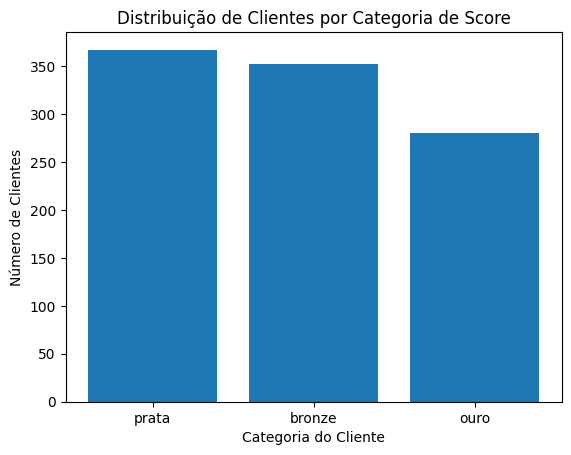

In [84]:
contagem_categorias = df['categoria_cliente'].value_counts()

# Criando o gráfico de barras
plt.bar(contagem_categorias.index, contagem_categorias.values)

# Configurando o título e os rótulos dos eixos
plt.title('Distribuição de Clientes por Categoria de Score')
plt.xlabel('Categoria do Cliente')
plt.ylabel('Número de Clientes')

# Exibindo o gráfico
plt.show()